In [3]:
import os 
import numpy as np
import natsort as n

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer, Reshape
from tensorflow.keras import backend as K


import matplotlib.pyplot as plt

0.5887050112577373
1.6986436005760381
1.1324290670506922


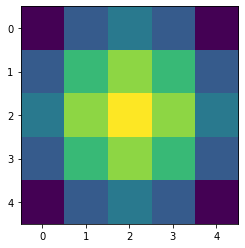

In [14]:
kernel_size = 5

x, y = np.meshgrid(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))
dst = np.sqrt(x*x + y*y)
# Considering 1 px = 150um

sigma = np.sqrt(np.log(2)/2) # Consider half-width to be 600um
print(sigma)
sigma = np.sqrt(2/np.log(2)) # Consider half width to be 8/3 px
print(sigma)
sigma =  4 / (3 * np.sqrt(2 * np.log(2)))# Consider half width to be 8/3 px
print(sigma)
muu = 0

kernel_weights = np.exp(-((dst-muu)**2 / (2.0 * sigma**2)))

kernel_weights = np.expand_dims(kernel_weights, axis=-1)
kernel_weights = np.repeat(kernel_weights, 1, axis=-1)
kernel_weights = np.expand_dims(kernel_weights, axis=-1)

def gaussian_blur_filter(shape, dtype=None):
    f = np.array(kernel_weights)

    assert f.shape == shape
    return K.variable(f, dtype='float32')

gaussian_blur = Conv2D(1, kernel_size, use_bias=False, kernel_initializer=gaussian_blur_filter, padding='same', trainable=False, name='gaussian_blur')

blurrer = Sequential()
blurrer.add(InputLayer(100))
blurrer.add(Reshape((10, 10, 1)))
blurrer.add(gaussian_blur)

blurrer.compile()

plt.imshow(kernel_weights[:, :, 0, 0])

['6kto16k_2step_70dB_latent.npy', '6kto16k_4step_70dB_latent.npy', '6kto16k_6step_70dB_latent.npy', '6kto16k_8step_70dB_latent.npy', '6kto16k_10step_70dB_latent.npy', '6kto16k_70dB_latent.npy', '10kHz_20Hz_45dB_latent.npy', '10kHz_20Hz_50dB_latent.npy', '10kHz_20Hz_55dB_latent.npy', '10kHz_20Hz_60dB_latent.npy', '10kHz_31Hz_45dB_latent.npy', '10kHz_31Hz_50dB_latent.npy', '10kHz_31Hz_55dB_latent.npy', '10kHz_31Hz_60dB_latent.npy', '10kHz_50Hz_45dB_latent.npy', '10kHz_50Hz_50dB_latent.npy', '10kHz_50Hz_55dB_latent.npy', '10kHz_50Hz_60dB_latent.npy', '10kHz_79Hz_45dB_latent.npy', '10kHz_79Hz_50dB_latent.npy', '10kHz_79Hz_55dB_latent.npy', '10kHz_79Hz_60dB_latent.npy', '10kHz_126Hz_45dB_latent.npy', '10kHz_126Hz_50dB_latent.npy', '10kHz_126Hz_55dB_latent.npy', '10kHz_126Hz_60dB_latent.npy', '10kHz_200Hz_45dB_latent.npy', '10kHz_200Hz_50dB_latent.npy', '10kHz_200Hz_55dB_latent.npy', '10kHz_200Hz_60dB_latent.npy', 'AM_20Hz_500ms_70dB_latent.npy', 'AM_23Hz_500ms_70dB_latent.npy', 'AM_27Hz_500

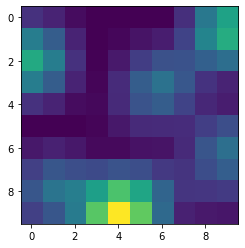

In [74]:
root = '/home/pouple/PhD/Code/Dimmy/Stims'
paths = [f for f in n.natsorted(os.listdir(root))]
print(paths)
latent_sounds = np.array([np.load(os.path.join('Stims', f)) for f in paths])

latent_blurred = blurrer.predict(latent_sounds).reshape(-1, 100)
plt.imshow(latent_blurred[0].reshape(10, 10))

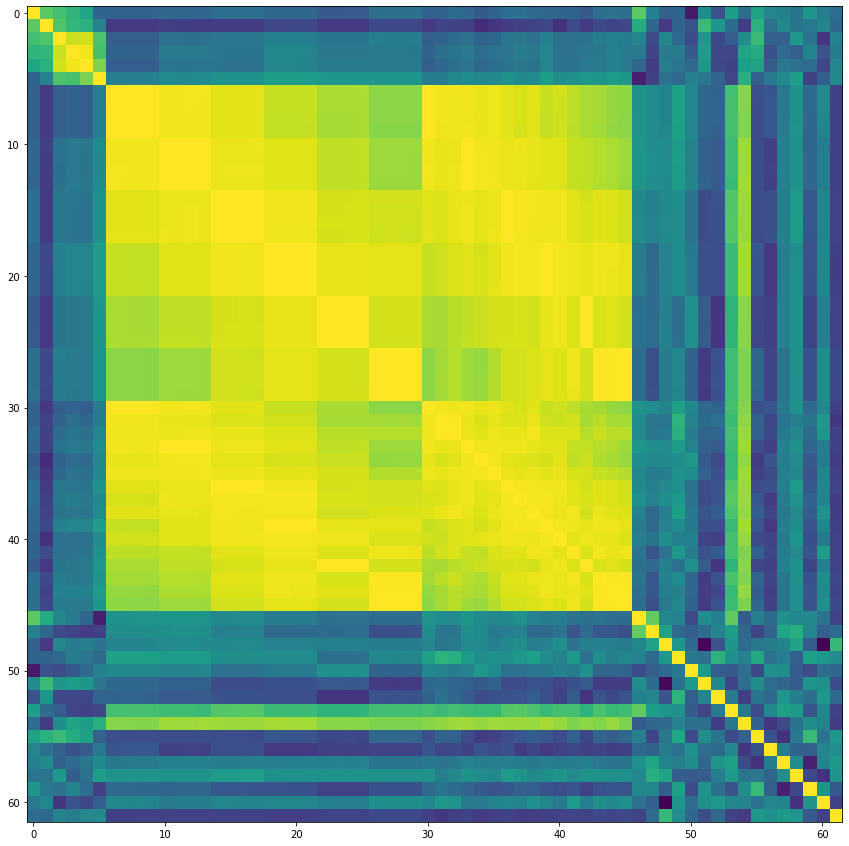

In [75]:
plt.figure(figsize=(15, 15))
auto_corr = np.corrcoef(latent_blurred)
plt.imshow(auto_corr)